In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re 
#from datasist.structdata import detect_outliers
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/CredScoreTrain.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [8]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [9]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [10]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [11]:
df.replace('_', np.NaN, inplace=True)
df.replace('', np.NaN, inplace=True)
df.replace('_______', np.NaN, inplace=True)

In [12]:
df = df.applymap( lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_')).replace(['','nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

<Figure size 864x1008 with 0 Axes>

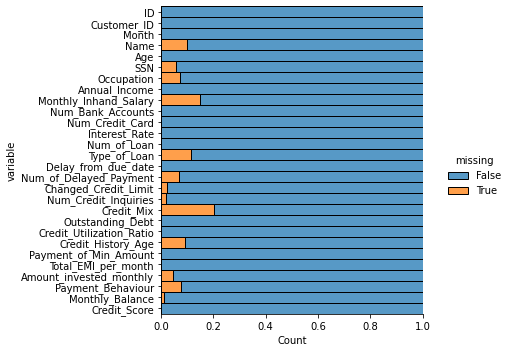

In [13]:
plt.figure(figsize=(12,14))
sb.displot(data = df.isna().melt(value_name = "missing"),y = "variable", hue = "missing", multiple = "fill", aspect = 1.25)

In [14]:
df. drop(["ID","Name","SSN","Customer_ID"], axis=1, inplace=True)

In [15]:
df['Payment_Behaviour'].value_counts(dropna=False)

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
NaN                                  7600
Name: Payment_Behaviour, dtype: int64

In [16]:
df['Credit_Score'] = df['Credit_Score'].map({'Poor':0, 'Standard':1, 'Good':2}).astype('float64')
df['Credit_Mix'] = df['Credit_Mix'].map({'Bad':0, 'Standard':1, 'Good':2}).astype('float64')
df['Month'] = df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8}).astype('float64')
df['Occupation'] = df['Occupation'].map({'Lawyer':1, 'Architect':2, 'Engineer':3, 'Scientist':4, 'Mechanic':5, 'Accountant':6, 'Developer':7, 'Media_Manager':8, 'Teacher':9, 'Entrepreneur':10, 'Doctor':11, 'Journalist':12, 'Manager':13, 'Musician':13, 'Writer':14}).astype('float64')
df['Payment_Behaviour'] = df['Payment_Behaviour'].map({'Low_spent_Small_value_payments':1, 'Low_spent_Medium_value_payments':2, 'Low_spent_Large_value_payments':3, 'High_spent_Small_value_payments':4, 'High_spent_Medium_value_payments':5, 'High_spent_Large_value_payments':6}).astype('float64')

In [17]:
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))

In [18]:
df['Num_Credit_Card'].replace(0,1,inplace=True)

In [19]:
def History_age(age):
    try : 
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan
df['Credit_History_Age'] = df['Credit_History_Age'].apply(History_age)

In [20]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [21]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'No':0, 'Yes':1}).astype('float64')

In [22]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

In [23]:
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

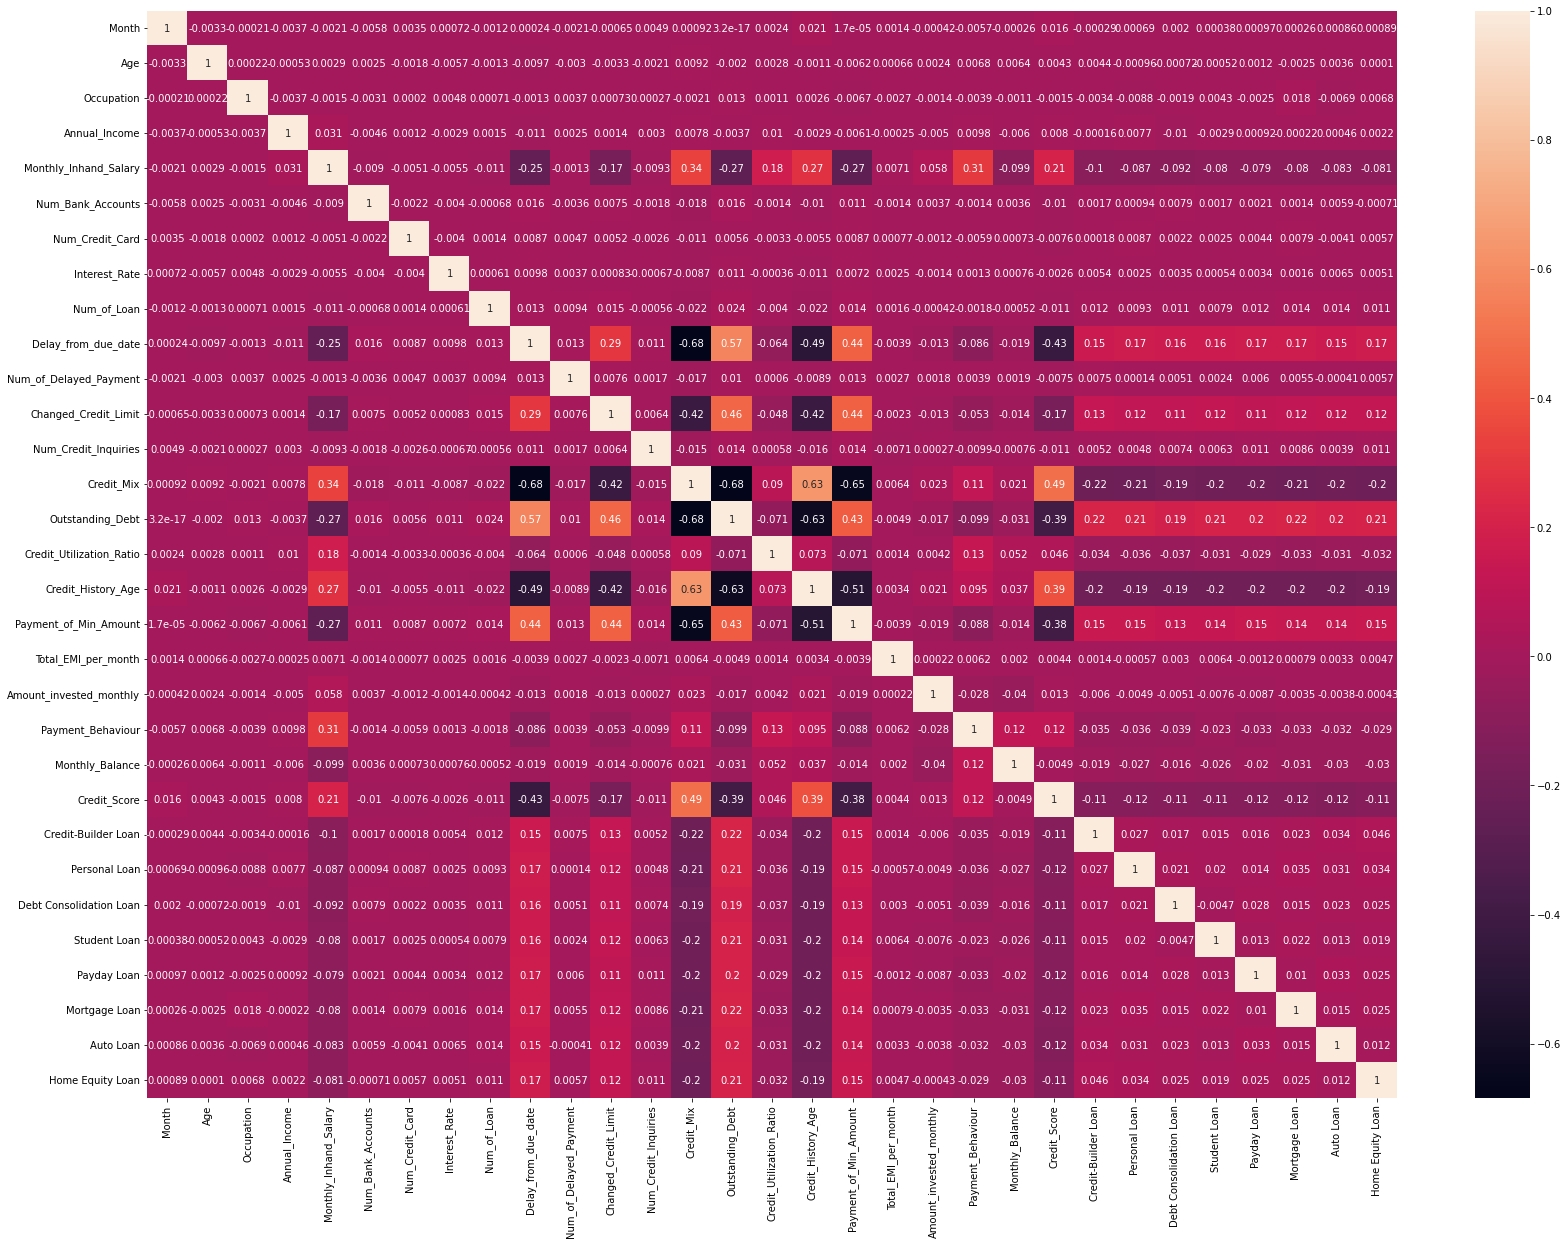

In [27]:
fig, ax = plt.subplots(figsize=(28,20))
correl = df.corr()
sb.heatmap(correl, xticklabels=correl.columns, yticklabels=correl.columns, annot=True, ax = ax)

In [28]:
X, Y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"] 

In [29]:
Y.value_counts(normalize=True)

1.0    0.53174
0.0    0.28998
2.0    0.17828
Name: Credit_Score, dtype: float64

In [30]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [31]:
#Using Power transformer to avoid Data Skewness
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [32]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [33]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=100000)
clf = clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
log_regr_score1 = clf.score(X_test, y_test)
print('log_regr_score: ',log_regr_score1)
confusion_matrix(y_test, Y_pred)

log_regr_score:  0.6248333333333334


array([[ 4302,  3913,   590],
       [ 2326, 11864,  1683],
       [  184,  2559,  2579]])